# 2. 머신러닝 맛보기1 - 분류문제

가장 먼저 다루어볼 문제는 분류 문제입니다. 데이터는 위스콘신 대학에서 공개한 유방함 데이터 입니다. **목적변수(종속변수) 는 'Class' 이며 0(정상) 과 1(환자)로 된 이진 분류(binary classification) 데이터** 입니다. 그 외 모든 변수는 환자의 조직검사 데이터 특성치(독립변수) X 입니다.

## 2.1 분석 데이터 검토

우선 유방암 데이터를 불러와 확인 해 봅니다.


In [4]:
# 유방암 데이터 로드
import pandas as pd
data = pd.read_csv('./extrafiles/breast-cancer-wisconsin.csv', encoding='utf-8')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [7]:
# 정상인과 암환자 수 집계
data['Class'].value_counts(sort=False) # 일반적으로 정렬에 드는 비용이 있어서 False 로 준듯

0    444
1    239
Name: Class, dtype: int64

In [8]:
# 데이터 프레임의 shape 확인
print(data.shape) ## 11개의 변수가 683행을 이루고 있다.

(683, 11)


## 2.2 특성(X)와 레이블(y) 나누기

<u>머신러닝에서 가장 먼저 해야 할 일은 특성치(X)와 레이블(y)을 분리하는 것</u> 입니다. 한 데이터 셋에서 작업 하지 않고 각 독립/종속 변수별 데이터셋을 분리하여 작업하는 것이 기본입니다.

우선 특성치(X) 데이터셋을 나누어야 하는데 방법은 다양합니다. 컬럼 이름으로 나누는 방법, 컬럼 인덱스를 이용하여 나누는 방법, loc 함수를 이용하여 나누는 방법등이 있습니다.

In [9]:
# 복사하기 편하게 컬럼명을 우선 나열
data.columns

Index(['code', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [13]:
# 방법 1. 특성 이름으로 데이터셋 나누기
X1 = data[['Clump_Thickness', 'Cell_Size', 'Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]

# 방법 2. 데이터 프레임의 컬럼 인덱스 정보를 이용하여 나누기
X2 = data[data.columns[1:10]]

# 방법 3. loc 함수를 이용하여 데이터셋 나누기
X3 = data.loc[ : , 'Clump_Thickness': 'Mitoses']


## 추출된 데이터 쉐입 확인
print(X1.shape)
print(X2.shape)
print(X3.shape)

(683, 9)
(683, 9)
(683, 9)


In [14]:
# 레이블 데이터셋 분리
y = data[["Class"]]
print(y.shape)

(683, 1)


## 2.3 train-test 데이터셋 나누기

X(특성치)와 y(레이블)이 잘 나누어 졌다면 모델을 훈련시킬 데이터셋 을 나누어야 합니다.
train data 와 test data 로 나누어야 하며,  사이킷 런의 모듈을 로드하여 사용합니다.

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42, stratify=y)
```

여기서 **random_state 는 데이터를 임의 추출하기 위핸 랜덤 시드 값**으로 매 추출 마다 동일한 시드 값을 이용하면 추출되는 데이터가 일정하게 유지되며, 1~100 까지 임의의 숫자로 지정 가능하다.

또한 **stratify=y** 옵션은 <u>훈련 데이터와 테스트 데이터를 분할 할때, 레이블의 범주 비율을 유사 하게 맞춰 주는 옵션</u>으로 분류 문제에서는 해당 옵션을 활성화 하는 것을 추천 합니다. 그렇지 않으면 훈련데이터에는 정상 데이터가 더 많고, 테스트 데이터에는 환자 데이터가 더 많아 모델의 일반화 능력이 떨어지게 될 수 있습니다.



In [19]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42, stratify=y)

print(y_train.mean()) # 훈련 데이터의 평균이 0.34 로 환자의 비율이 34%에 해당함을 의미한다.
print(y_test.mean()) # 테스트 데이터의 평균이 0.35로 환자의 비율이 훈련 데이터와 유사하게 
                     # 분할 되었음을 알 수 있다.

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


## 2.4 정규화

독립변수, 특성치(X)는 모든 단위를 고르게 맞춰 주기 위한 정규화 작업을 진행 하여야 합니다. 특성치의 측정 단위가 제각각인 경우 각 변수가 미치는 영향도가 그 단위 크기에 따라 다르게 작용하기 때문에 정상적인 데이터 분류를 위해서는 그 스케일을 동일하게 맞춰 주어야 합니다.

정규화를 위한 라이브러리는 **sklearn.preprocessing** 에 있습니다. 자주 사용되는 유형으로는 **MinMaxScaler, StandardScaler** 가 있습니다.

※ 스케일러 설명 
- MinMaxScaler(모든 feature(특징변수)의 값이 0\~1 사이가 되도록 데이터를 조정 한다. 다만 이상치가 있는 경우 변환된 값의 범위가 지나치게 압출될 수 있다)
- StandardScaler(평균이 0이고 분산이 1인 정규 분포로 스케일링 한다.)
- MaxAbsScaler(최대절대값과 최소절대값이 1, 0이 되도록 스케일링)
- RobustScaler(중앙값(median)과 IQR(사분위편차)사용 하여 아웃라이어 영향을 최소화 시키는 스케일링)
- Normalizer 가 있다.

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

### 가. train data 의 정규화

MinMax 정규화 진행 방법을 알아 보겠습니다.

1. 우선 훈련용 데이터셋에 MinMaxScaler 를 적용 하겠다는 선언을 합니다.
2. Scaler 를 통해 해당 tranform 명령을 사용하여 데이터를 변환 합니다.

※ 여기서 주의할 점은 추루 test 데이터를 정규화 할 때에도 train 데이터와 동일한 기준을 적용해야 한다는 점 입니다.

In [25]:
# X_train 데이터에 MinMax Scaler 를 통한 정규화 수행
scaler_minmax .fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

# X_train 데이터에 StandardScaler 를 통한 정규화 수행
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [26]:
# MinMax Scaler 로 정규화된 데이터는 모두 0에서 1사이의 값으로 변환 된 것을 확인 할 수 있습니다.
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Standard Scaler 로 정규화된 데이터는 평균이 0, 표준편차가 1의 정규분포 형태로 변환 된 것을 확인 할 수 있습니다.
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,-1.548241e-16,-1.543904e-16,-1.353084e-16,1.149254e-16,5.767956e-17,1.674008e-16,-2.775558e-17,-3.642919e-17,6.938894e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


### 나. test data의 정규화

MinMax Scaler 를 통해 테스트 데이터로 정규화를 진행하여야 합니다. 다만 여기서 다른 점은 **fit 을 통한 데이터셋 지정은 생략** 합니다. **fit 은 머신러닝 모델의 기준이 되는 데이터를 설정 하는 함수**로. 훈련 데이터가 그 기준이기 때문에 이를 변경 하여서는 안됩니다.

따라서 X_test 데이터셋은 scaler_minmax.transform() 함수를 바로 적용할 수 있습니다.

In [35]:
# MinMax Scaler - test data 정규화
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# Standard Scaler - test data 정규화
X_scaled_standard_test = scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.121175,0.083483,0.039700,-0.021605,0.114263,-0.028149,0.035612,0.105430,-0.009802
std,0.941174,1.069038,1.002747,0.987654,1.071204,1.003453,1.103943,1.089918,1.048292
min,-1.174173,-0.693631,-0.731909,-0.642378,-0.995936,-0.706043,-1.016165,-0.600888,-0.354868
25%,-0.474317,-0.693631,-0.731909,-0.642378,-0.537376,-0.706043,-1.016165,-0.600888,-0.354868
50%,0.225540,-0.693631,-0.397023,-0.642378,-0.537376,-0.706043,-0.177686,-0.600888,-0.354868
75%,0.575468,0.635234,0.607635,0.053701,0.609026,0.392723,0.660794,0.573367,-0.354868
max,1.975181,2.296314,2.282064,2.489978,3.131108,1.766180,2.756993,2.418624,4.903108


※ <u>유의할 점은 대상 데이터셋을 기준으로 모델을 fit 한것이 아니기 때문에 Standard Scaler 의 경우 평균이 0이 아니며, 표준 편차도 1이 아니게 됩니다.</u>

## 2.5 모델 학습

데이터 정규화까지 마친 상태라면 이제 모델을 학습할 단계 입니다. 모델 학습을 위해서 sklearn 패키지를 활용할 것이며, 여기서는 호지스틱 회귀모형을 적용할 예정입니다. 

In [38]:
# 로지스틱 회귀 모형의 적용
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

C:\Users\mauro\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [41]:
# 로지스틱 회귀 분석 결과 확인
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.97265625

**<center>[모델 훈련]&nbsp;&nbsp;->&nbsp;&nbsp;[모델 예측]&nbsp;&nbsp;->&nbsp;&nbsp;[모델 정확도]</center>**

머신러닝에서 반드시 진행 되는 기계쩍인 단계 입니다. 때문에 해당 호출 명령어를 확인 하고 가겠습니다.

[사이킷런의 머신 러닝 훈련시 주요 명령어]

|목적|명령어|특성치(X) 설정|레이블(y) 설정|
|:--|:--|:--:|:--:|
|모델훈련|model.fit(X, y)|○|○|
|모델예측(범주)|model.predict(X)|○||
|모델예측(확률)|model.predict_proba(X)|○||
|모델정확도|model.score(X, y)|○|○|

- model.predict (모델예측-범주) : 결과가 정상(0), 환자(1)와 같은 범주 값이 나옵니다.
- model.predict_proba (모델예측-확률) : 결과가 확률 즉 정상일 확률을 0과 1사이 값으로 나타냅니다.
- model.score (모델정확도) : 테스트 데이터의 정확도(accuracy)를 확인한 값입니다.

In [43]:
# 테스트 데이터의 결과 확인
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.9590643274853801

In [44]:
# 혼동행렬을 통해 예측 결과값을 수치로 만들어 보자
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련 데이터 오차행렬:\n", confusion_train)

훈련 데이터 오차행렬:
 [[328   5]
 [  9 170]]


In [45]:
# 테스트 데이터 오차행렬
confusion_train = confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_train)

테스트 데이터 오차행렬:
 [[106   5]
 [  2  58]]


In [49]:
# 학습데이터 평가지표 출력
from sklearn.metrics import classification_report
print(classification_report(y_train, pred_train))

# 테스트데이터 평가지표 출력
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



**혼동행렬**
![혼동행렬](./extrafiles/matrix.png)

- 정확도 (accuracy) : 전체 데이터에서 T/F 를 맞춘 비율 **TP + TN / TP + FN + FP + TN**
- 정밀도 (precision) : 참으로 예측한 값들 중에 실제 값이 참인 비율 **(양성예측도) TP/(FP+TP)**
- 재현율 (recall) : 실제 값이 참인 것들 중에 예측값과 실제 값이 참으로 일치한 비율 **TP/(FN+TP)**
- f1-Score (조화평균) : **2/(1/정밀도+1/재현율)**

In [50]:
# 분류 문젱므로 ROC 커브도 출력 해본다.
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# 거짓 긍정률과 참 긍정률 스레숄드를 산출한다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.decision_function(X_scaled_minmax_test))

# 
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc

0.9923423423423423

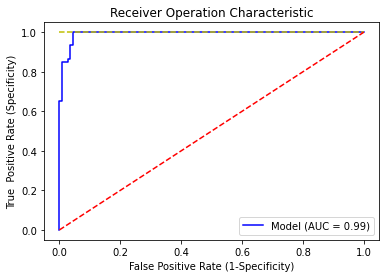

In [54]:
# ROC Curve 를 그려보자
import matplotlib.pyplot as plt
plt.title('Receiver Operation Characteristic')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True  Positive Rate (Specificity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

## 2.6 예측값 병합 및 저장

모든 모델 훈련과 테스트 검증이 끝났다면 예측된 값과 확률을 원본 데이터와 합치고 이를 csv 파일로 저장해보도록 하겠습니다.



In [56]:
# 학습 데이터의 예측 확률 저장
prob_train = model.predict_proba(X_scaled_minmax_train) # 예측율 컬럼 추출
y_train[['y_pred']]=pred_train
y_train[['y_prob0', 'y_prob1']]=prob_train # 정상:0 과 환자:1의 확률 값을 각 대입
y_train

<ipython-input-56-c58dfcde3cd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[['y_pred']]=pred_train
C:\Users\mauro\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-56-c58dfcde3cd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Class,y_pred,y_prob0,y_prob1
131,0,0,0.981014,0.018986
6,0,0,0.768191,0.231809
0,0,0,0.966431,0.033569
269,0,0,0.988880,0.011120
56,1,1,0.203161,0.796839
...,...,...,...,...
515,1,1,0.021270,0.978730
216,1,0,0.895961,0.104039
312,1,1,0.113440,0.886560
11,0,0,0.987405,0.012595


In [59]:
# 테스트 데이터의 예측 확률 저장
prob_test = model.predict_proba(X_scaled_minmax_test)
y_test[['y_pred']] = pred_test
y_test[['y_prob0','y_prob1']] = prob_test
y_test

<ipython-input-59-4d4c2f57d94f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[['y_pred']] = pred_test
C:\Users\mauro\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-59-4d4c2f57d94f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Class,y_pred,y_prob0,y_prob1
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428
183,0,0,0.979370,0.020630
478,1,1,0.001305,0.998695
...,...,...,...,...
425,1,1,0.006201,0.993799
314,1,1,0.067440,0.932560
15,1,1,0.436887,0.563113
510,0,0,0.983410,0.016590


In [61]:
# 테스트 데이터 병합
Total_test = pd.concat([X_test, y_test], axis=1)
Total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
541,5,2,2,2,1,1,2,1,1,0,0,0.955893,0.044107
549,4,1,1,1,2,1,3,2,1,0,0,0.970887,0.029113
318,5,2,2,2,2,1,2,2,1,0,0,0.943572,0.056428
183,1,2,3,1,2,1,3,1,1,0,0,0.979370,0.020630
478,5,10,10,10,6,10,6,5,2,1,1,0.001305,0.998695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,10,4,3,10,4,10,10,1,1,1,1,0.006201,0.993799
314,8,10,3,2,6,4,3,10,1,1,1,0.067440,0.932560
15,7,4,6,4,6,1,4,3,1,1,1,0.436887,0.563113
510,3,1,1,2,2,1,1,1,1,0,0,0.983410,0.016590


In [63]:
# 산출 결과를 파일로 저장
Total_test.to_csv("./extrafiles/classification_test.csv")